<a href="https://colab.research.google.com/github/TheVijay-15/GlobalSuperstore-Sales-Forecasting-Analytics/blob/main/01_eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Global Superstore - Exploratory Data Analysis
## Business Context:
###This dataset contains 51,290 transactions from a global retailer (2011-2014).
##Goal: Predict future sales, optimize inventory, and identify growth opportunities.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set styles
plt.style.use('ggplot') # Changed to ggplot style for a different background
sns.set_palette('viridis') # Changed palette for more distinct colors
plt.rcParams['figure.figsize'] = (16, 12) # Increased figure size for better fit

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GlobalSuperstore_Project/data/raw/Global Superstore.csv', encoding='ISO-8859-1')


print("DATASET OVERVIEW")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
display(df.head())
print("\nColumns:")
print(df.columns.tolist())

DATASET OVERVIEW
Shape: 51290 rows, 24 columns
Memory Usage: 9.39 MB

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical



Columns:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [ ]:
# Data Quality Check
print("DATA QUALITY REPORT")

# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})
print("Missing Values:")
print(missing_report[missing_report['Missing_Count'] > 0])

# Check duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_rows}")

# Check data types
print("\nData Types:")
print(df.dtypes)


# Statistical Summary

print("STATISTICAL SUMMARY")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric Columns Statistics:")
display(df[numeric_cols].describe().T)

# Check unique values
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count < 15:
        print(f"   Values: {df[col].unique()}")

DATA QUALITY REPORT
Missing Values:
             Missing_Count  Missing_Percentage
Postal Code          41296            80.51472

Duplicate Rows: 0

Data Types:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object
STATISTICAL SUMMARY
Numeric Columns Statistics:


,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570



Unique Values in Categorical Columns:
Order ID: 25035 unique values
Order Date: 1430 unique values
Ship Date: 1464 unique values
Ship Mode: 4 unique values
   Values: ['Same Day' 'Second Class' 'First Class' 'Standard Class']
Customer ID: 1590 unique values
Customer Name: 795 unique values
Segment: 3 unique values
   Values: ['Consumer' 'Corporate' 'Home Office']
City: 3636 unique values
State: 1094 unique values
Country: 147 unique values
Market: 7 unique values
   Values: ['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada']
Region: 13 unique values
   Values: ['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']
Product ID: 10292 unique values
Category: 3 unique values
   Values: ['Technology' 'Furniture' 'Office Supplies']
Sub-Category: 17 unique values
Product Name: 3788 unique values
Order Priority: 4 unique values
   Values: ['Critical' 'Medium' 'High' 'Low']


In [ ]:
# Key Business Metrics Analysis

print("BUSINESS METRICS ANALYSIS")


# Total metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
avg_profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Average Sales per Order: ${total_sales/total_orders:,.2f}")
print(f"Average Profit per Order: ${total_profit/total_orders:,.2f}")

BUSINESS METRICS ANALYSIS
Total Sales: $12,642,501.91
Total Profit: $1,467,457.29
Total Orders: 25,035
Average Profit Margin: 11.61%
Average Sales per Order: $504.99
Average Profit per Order: $58.62


TIME SERIES ANALYSIS


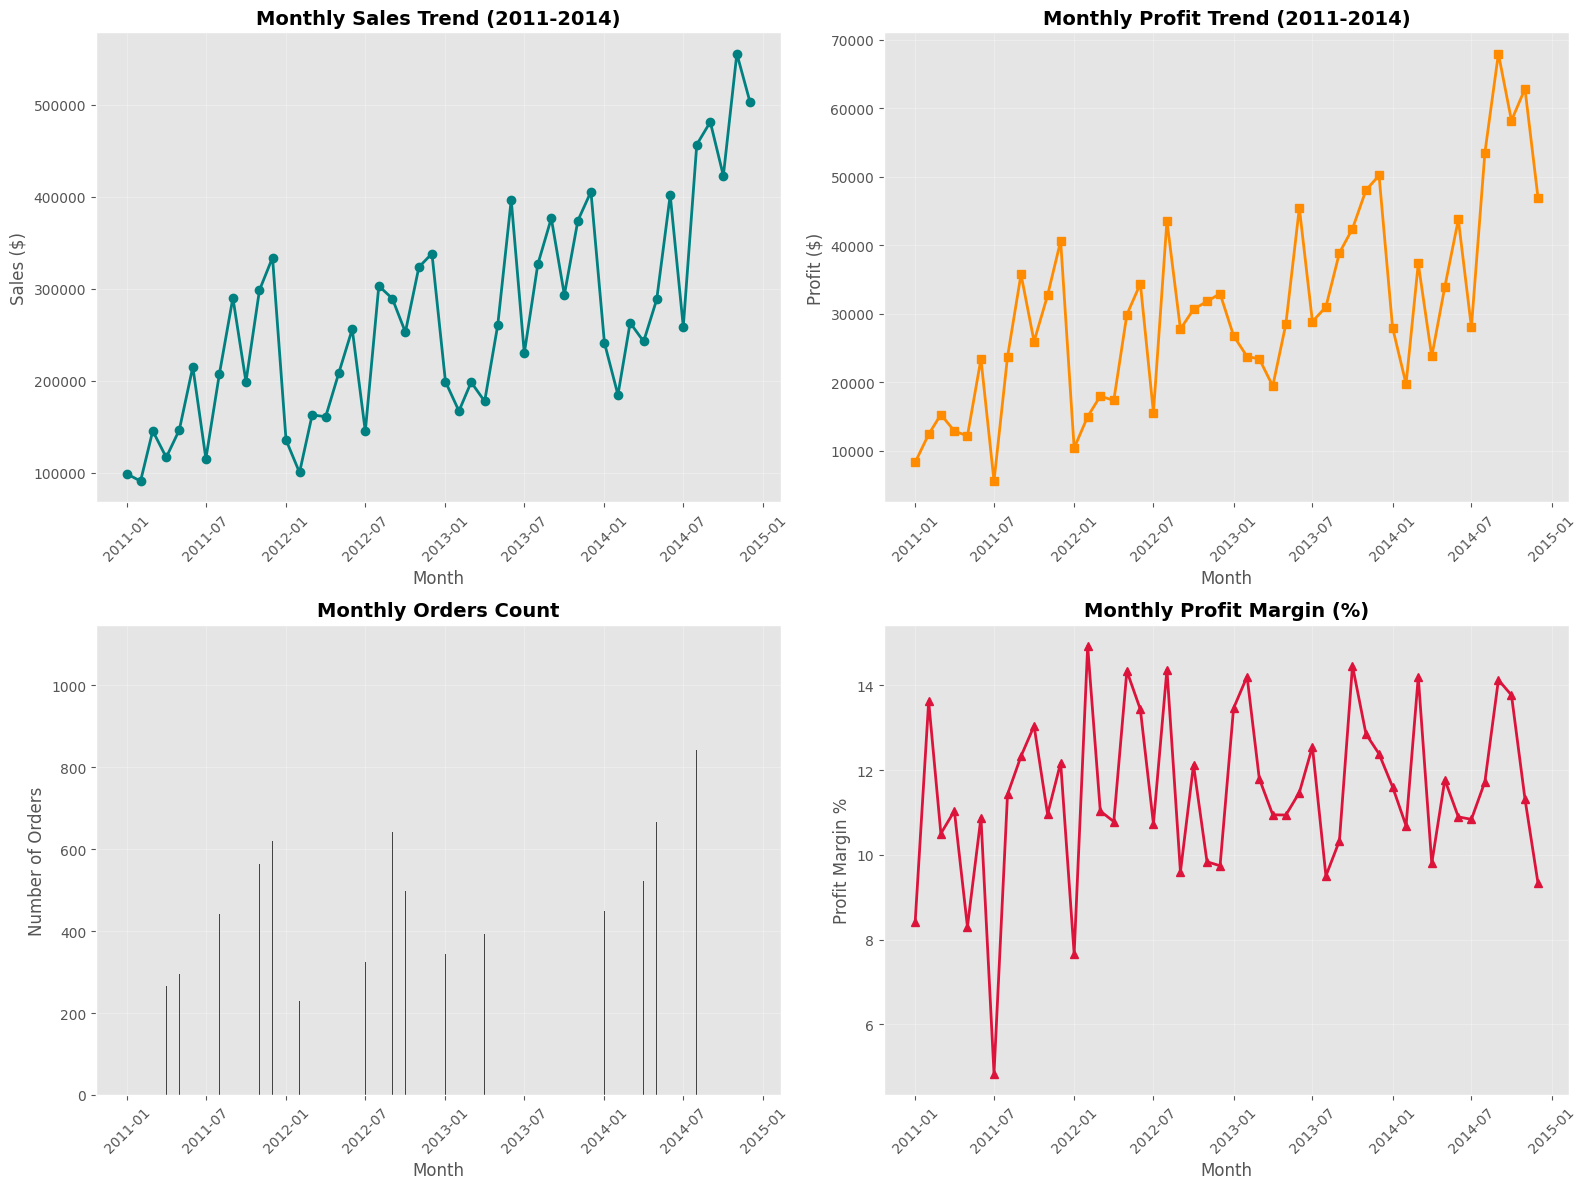

In [ ]:
# Time Series Analysis
print("TIME SERIES ANALYSIS")

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Extract time features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Quarter'] = df['Order Date'].dt.quarter
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Order_DayOfMonth'] = df['Order Date'].dt.day

# Monthly sales trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Order ID': 'nunique'
}).reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Plot monthly trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales trend
axes[0,0].plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linewidth=2, color='teal')
axes[0,0].set_title('Monthly Sales Trend (2011-2014)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Profit trend
axes[0,1].plot(monthly_sales['Order Date'], monthly_sales['Profit'], marker='s', color='darkorange', linewidth=2)
axes[0,1].set_title('Monthly Profit Trend (2011-2014)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Profit ($)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Orders trend
axes[1,0].bar(monthly_sales['Order Date'], monthly_sales['Order ID'], alpha=0.7, color='black')
axes[1,0].set_title('Monthly Orders Count', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Orders')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Profit margin trend
monthly_sales['Profit_Margin'] = (monthly_sales['Profit'] / monthly_sales['Sales']) * 100
axes[1,1].plot(monthly_sales['Order Date'], monthly_sales['Profit_Margin'],
               marker='^', color='crimson', linewidth=2)
axes[1,1].set_title('Monthly Profit Margin (%)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Profit Margin %')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

GEOGRAPHICAL ANALYSIS
Top 10 Countries by Sales:


,Sales,Profit,Order ID,Avg_Profit_Margin
Country,,,,
United States,2.297201e+06,286397.02170,5009,12.467217
Australia,9.252359e+05,103907.43300,1420,11.230373
France,8.589311e+05,109029.00300,1222,12.693568
China,7.005620e+05,150683.08500,925,21.508886
Germany,6.288400e+05,107322.82050,907,17.066792
Mexico,6.225906e+05,102818.09752,1329,16.514559
India,5.896501e+05,129071.83500,785,21.889564
United Kingdom,5.285763e+05,111900.15000,775,21.170104
Indonesia,4.048875e+05,15608.67790,698,3.855065


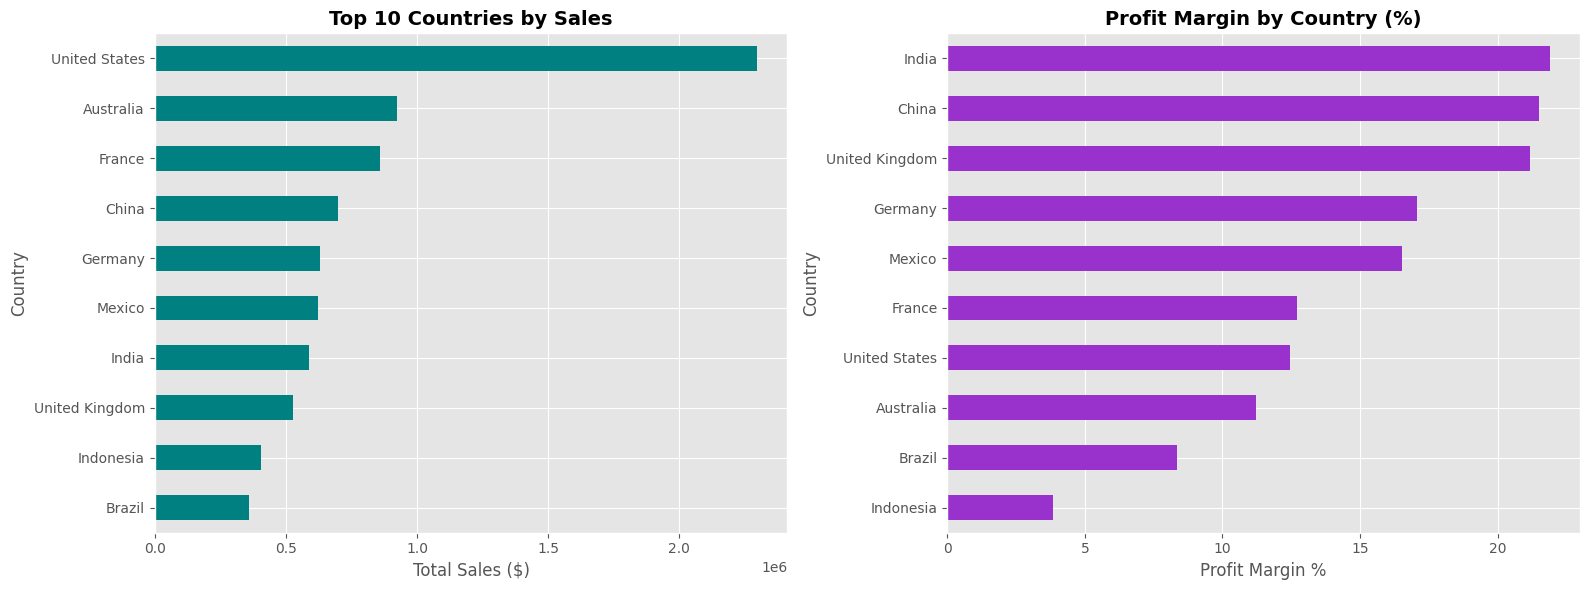

In [ ]:
# Geographical Analysis
print("GEOGRAPHICAL ANALYSIS")

# Top 10 countries by sales
country_sales = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).sort_values('Sales', ascending=False).head(10)

country_sales['Avg_Profit_Margin'] = (country_sales['Profit'] / country_sales['Sales']) * 100
print("Top 10 Countries by Sales:")
display(country_sales)

# Plot top countries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sales by country
country_sales['Sales'].sort_values().plot(kind='barh', ax=ax1, color='#008080')
ax1.set_title('Top 10 Countries by Sales', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Sales ($)')
ax1.set_ylabel('Country')

# Profit margin by country
country_sales['Avg_Profit_Margin'].sort_values().plot(kind='barh', ax=ax2, color='#9932CC')
ax2.set_title('Profit Margin by Country (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Profit Margin %')
ax2.set_ylabel('Country')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/country_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

PRODUCT CATEGORY ANALYSIS
Category Performance:


,Total_Sales,Avg_Sales,Transaction_Count,Total_Profit,Avg_Profit,Total_Quantity,Profit_Margin
Category,,,,,,,
Furniture,4110874.19,416.25,9876,285204.72,28.88,34954,6.937812
Office Supplies,3787070.23,121.10,31273,518473.83,16.58,108182,13.690632
Technology,4744557.50,467.86,10141,663778.73,65.45,35176,13.990319



Top 15 Sub-Categories by Sales:


Sales        Profit  Quantity  \
Category        Sub-Category                                         
Technology      Phones        1.706824e+06  216717.00580     11870   
                Copiers       1.509436e+06  258567.54818      7454   
Furniture       Chairs        1.501682e+06  140396.26750     12336   
                Bookcases     1.466572e+06  161924.41950      8310   
Office Supplies Storage       1.127086e+06  108461.48980     16917   
                Appliances    1.011064e+06  141680.58940      6078   
Technology      Machines      7.790601e+05   58867.87300      4906   
Furniture       Tables        7.570419e+05  -64083.38870      3083   
Technology      Accessories   7.492370e+05  129626.30620     10946   
Office Supplies Binders       4.619115e+05   72449.84600     21429   
Furniture       Furnishings   3.855783e+05   46967.42550     11225   
Office Supplies Art           3.720920e+05   57953.91090     16301   
                Paper         2.442917e+05   59207.68270     12822   
                Supplies      2.430742e+05   22583.26310      8543   
                Envelopes     1.709043e+05   29601.11630      8380   

                              Profit_Margin  
Category        Sub-Category                 
Technology      Phones            12.697091  
                Copiers           17.130074  
Furniture       Chairs             9.349269  
                Bookcases         11.041012  
Office Supplies Storage            9.623179  
                Appliances        14.013015  
Technology      Machines           7.556269  
Furniture       Tables            -8.464972  
Technology      Accessories       17.301108  
Office Supplies Binders           15.684789  
Furniture       Furnishings       12.181036  
Office Supplies Art               15.575158  
                Paper             24.236467  
                Supplies           9.290686  
                Envelopes         17.320287

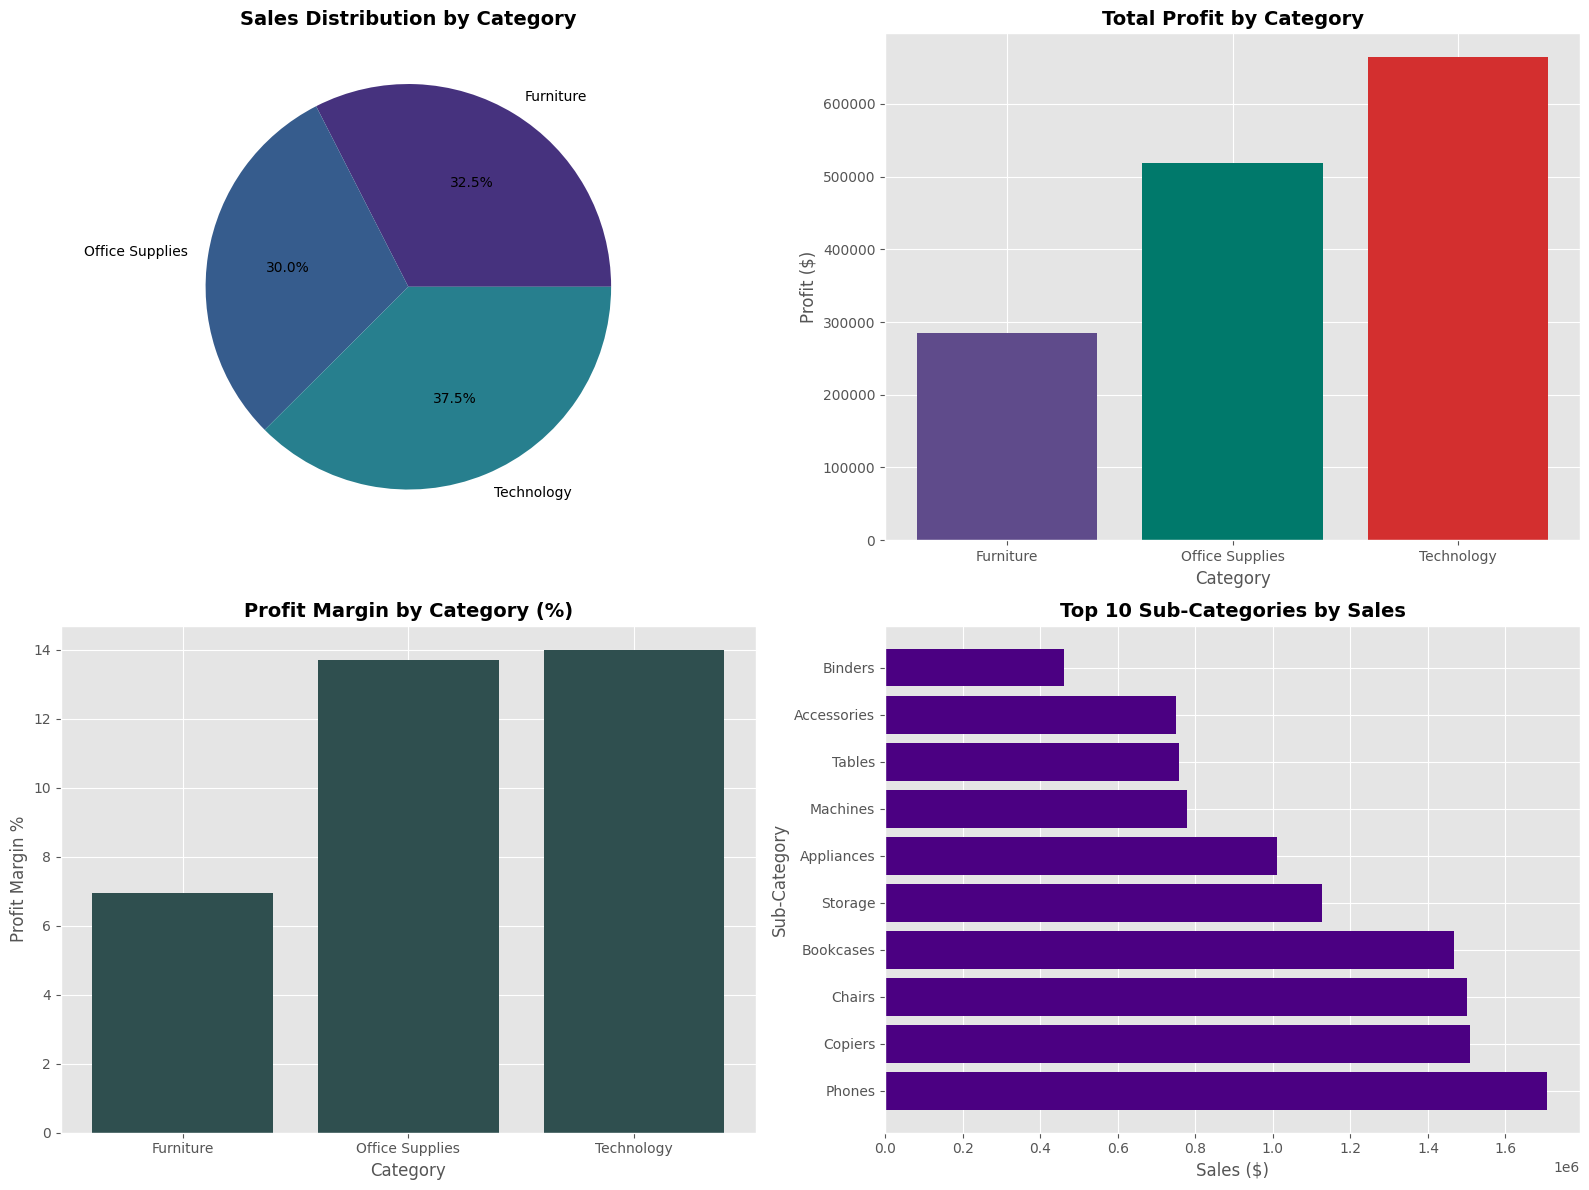

In [ ]:
# Product Category Analysis
print("PRODUCT CATEGORY ANALYSIS")

category_analysis = df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)

category_analysis.columns = ['Total_Sales', 'Avg_Sales', 'Transaction_Count',
                             'Total_Profit', 'Avg_Profit', 'Total_Quantity']
category_analysis['Profit_Margin'] = (category_analysis['Total_Profit'] /
                                      category_analysis['Total_Sales']) * 100
print("Category Performance:")
display(category_analysis)

# Sub-category analysis
subcat_sales = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values('Sales', ascending=False).head(15)

subcat_sales['Profit_Margin'] = (subcat_sales['Profit'] / subcat_sales['Sales']) * 100
print("\nTop 15 Sub-Categories by Sales:")
display(subcat_sales)

# Plot category analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales by category
category_analysis['Total_Sales'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0])
axes[0,0].set_title('Sales Distribution by Category', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('')

# Profit by category
axes[0,1].bar(category_analysis.index, category_analysis['Total_Profit'], color=['#5F4B8B', '#00796B', '#D32F2F'])
axes[0,1].set_title('Total Profit by Category', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Profit ($)')
axes[0,1].tick_params(axis='x', rotation=0)

# Profit margin by category
axes[1,0].bar(category_analysis.index, category_analysis['Profit_Margin'], color='#2F4F4F') # Corrected color hex code
axes[1,0].set_title('Profit Margin by Category (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Profit Margin %')
axes[1,0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1,0].tick_params(axis='x', rotation=0)

# Top sub-categories
top_subcats = subcat_sales.head(10).reset_index()
axes[1,1].barh(top_subcats['Sub-Category'], top_subcats['Sales'], color='#4B0082') # Changed color
axes[1,1].set_title('Top 10 Sub-Categories by Sales', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Sales ($)')
axes[1,1].set_ylabel('Sub-Category')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

CUSTOMER SEGMENT ANALYSIS
Customer Segment Performance:


,Total_Sales,Avg_Sales_Per_Transaction,Transaction_Count,Total_Profit,Avg_Profit_Per_Transaction,Unique_Customers,Profit_Margin,Sales_per_Customer
Segment,,,,,,,,
Consumer,6507949.42,245.42,26518,749239.78,28.25,818,11.512686,7955.928386
Corporate,3824697.52,247.89,15429,441208.33,28.60,476,11.535771,8035.078824
Home Office,2309854.97,247.23,9343,277009.18,29.65,296,11.992492,7803.564088


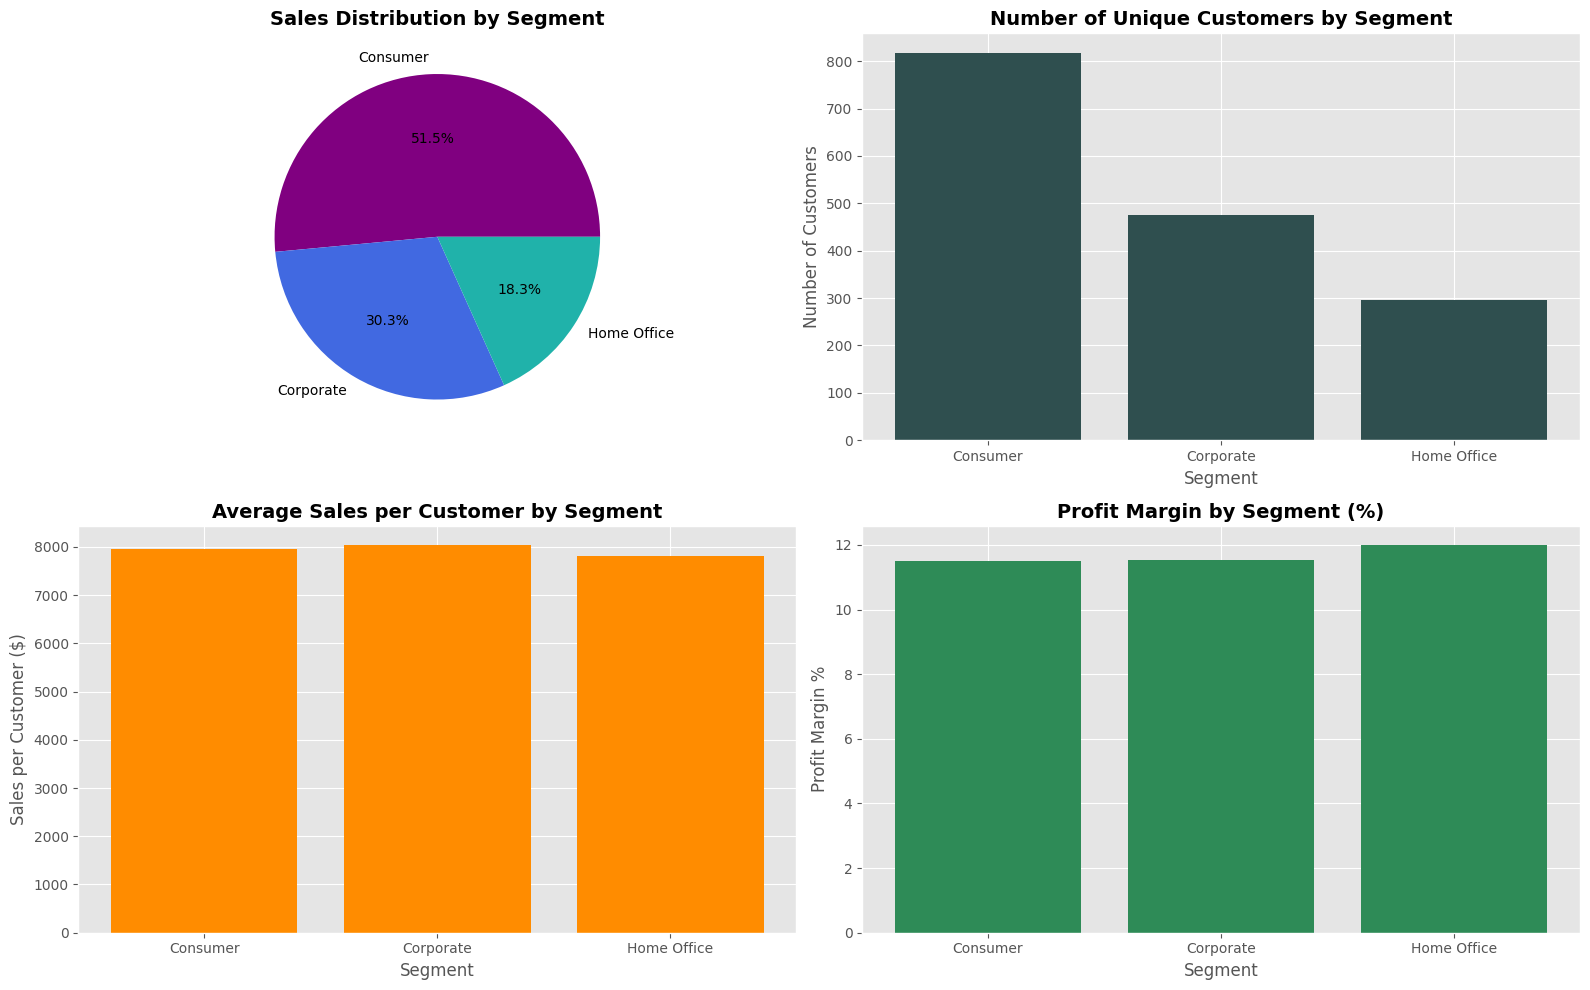

In [ ]:
# Customer Segment Analysis

print("CUSTOMER SEGMENT ANALYSIS")

segment_analysis = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Customer ID': 'nunique'
}).round(2)

segment_analysis.columns = ['Total_Sales', 'Avg_Sales_Per_Transaction', 'Transaction_Count',
                            'Total_Profit', 'Avg_Profit_Per_Transaction', 'Unique_Customers']

segment_analysis['Profit_Margin'] = (segment_analysis['Total_Profit'] /
                                     segment_analysis['Total_Sales']) * 100
segment_analysis['Sales_per_Customer'] = segment_analysis['Total_Sales'] / segment_analysis['Unique_Customers']

print("Customer Segment Performance:")
display(segment_analysis)

# Plot segment analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Sales by segment
segment_analysis['Total_Sales'].plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0], colors=['#800080', '#4169E1', '#20B2AA']) # Changed colors
axes[0,0].set_title('Sales Distribution by Segment', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('')

# Customers by segment
axes[0,1].bar(segment_analysis.index, segment_analysis['Unique_Customers'], color='darkslategray') # Changed color
axes[0,1].set_title('Number of Unique Customers by Segment', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Segment')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].tick_params(axis='x', rotation=0)

# Sales per customer
axes[1,0].bar(segment_analysis.index, segment_analysis['Sales_per_Customer'], color='darkorange') # Changed color
axes[1,0].set_title('Average Sales per Customer by Segment', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Segment')
axes[1,0].set_ylabel('Sales per Customer ($)')
axes[1,0].tick_params(axis='x', rotation=0)

# Profit margin by segment
axes[1,1].bar(segment_analysis.index, segment_analysis['Profit_Margin'], color='seagreen') # Changed color
axes[1,1].set_title('Profit Margin by Segment (%)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Segment')
axes[1,1].set_ylabel('Profit Margin %')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/segment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELATION ANALYSIS


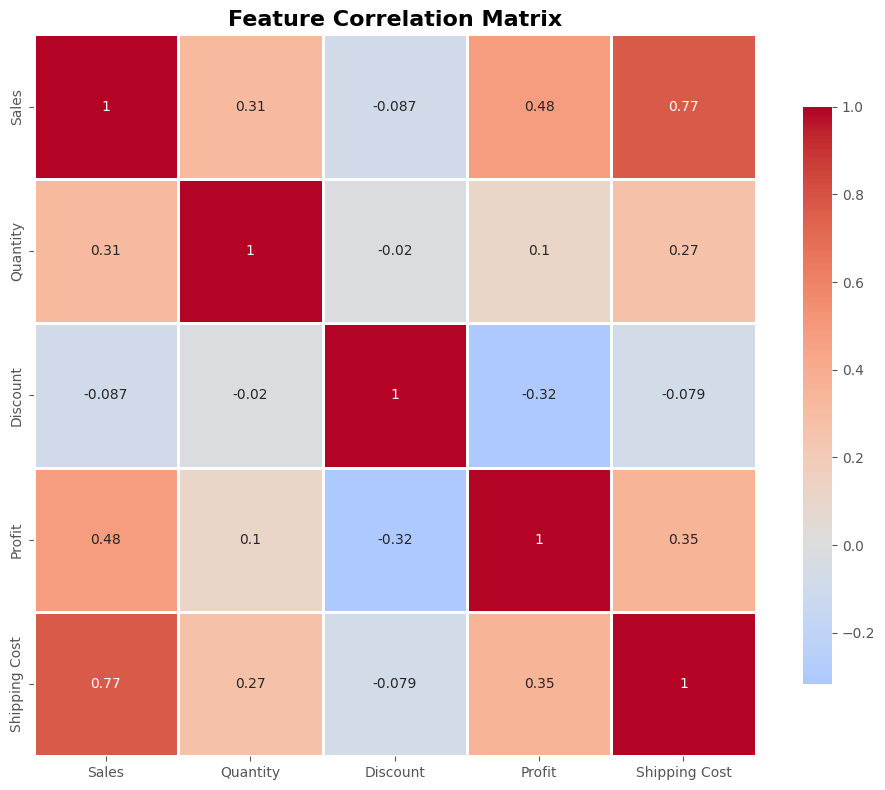

Key Correlations:
Sales vs Profit: 0.485
Quantity vs Sales: 0.314
Discount vs Profit: -0.316
SHIPPING ANALYSIS
Shipping Mode Performance:


,Sales,Profit,Order ID,Shipping Cost,Profit_Margin,Avg_Sales_per_Order
Ship Mode,,,,,,
First Class,1830976.14,208104.68,3821,41.05,11.365778,479.187684
Same Day,667201.98,76173.07,1347,42.94,11.416793,495.324410
Second Class,2565671.68,292583.53,5119,30.47,11.403779,501.205642
Standard Class,7578652.11,890596.02,15154,19.97,11.751378,500.109021


In [ ]:
# Correlation Analysis

print("CORRELATION ANALYSIS")

# Select numeric columns
numeric_df = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Key correlations
print("Key Correlations:")
print(f"Sales vs Profit: {correlation_matrix.loc['Sales', 'Profit']:.3f}")
print(f"Quantity vs Sales: {correlation_matrix.loc['Quantity', 'Sales']:.3f}")
print(f"Discount vs Profit: {correlation_matrix.loc['Discount', 'Profit']:.3f}")



# Shipping Analysis
print("SHIPPING ANALYSIS")

shipping_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique',
    'Shipping Cost': 'mean'
}).round(2)

shipping_analysis['Profit_Margin'] = (shipping_analysis['Profit'] / shipping_analysis['Sales']) * 100
shipping_analysis['Avg_Sales_per_Order'] = shipping_analysis['Sales'] / shipping_analysis['Order ID']

print("Shipping Mode Performance:")
display(shipping_analysis)

In [ ]:
# Save initial insights
insights = {
    'total_rows': df.shape[0],
    'total_columns': df.shape[1],
    'total_sales': total_sales,
    'total_profit': total_profit,
    'total_orders': total_orders,
    'avg_profit_margin': avg_profit_margin,
    'top_category': category_analysis['Total_Sales'].idxmax(),
    'most_profitable_category': category_analysis['Total_Profit'].idxmax(),
    'highest_margin_category': category_analysis['Profit_Margin'].idxmax(),
    'top_country': country_sales.index[0],
    'most_profitable_segment': segment_analysis['Total_Profit'].idxmax()
}

print("KEY INSIGHTS SUMMARY")
for key, value in insights.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' ').title()}: {value:,.2f}")
    else:
        print(f"{key.replace('_', ' ').title()}: {value}")

# Save cleaned data for next steps
df.to_csv('/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/initial_cleaned.csv', index=False)
print("\nData saved to '/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/initial_cleaned.csv'")

KEY INSIGHTS SUMMARY
Total Rows: 51290
Total Columns: 29
Total Sales: 12,642,501.91
Total Profit: 1,467,457.29
Total Orders: 25035
Avg Profit Margin: 11.61
Top Category: Technology
Most Profitable Category: Technology
Highest Margin Category: Technology
Top Country: United States
Most Profitable Segment: Consumer

Data saved to '/content/drive/MyDrive/GlobalSuperstore_Project/data/processed/initial_cleaned.csv'
